# Pizzas and Reservations data
Just load and plot basic statistical data.

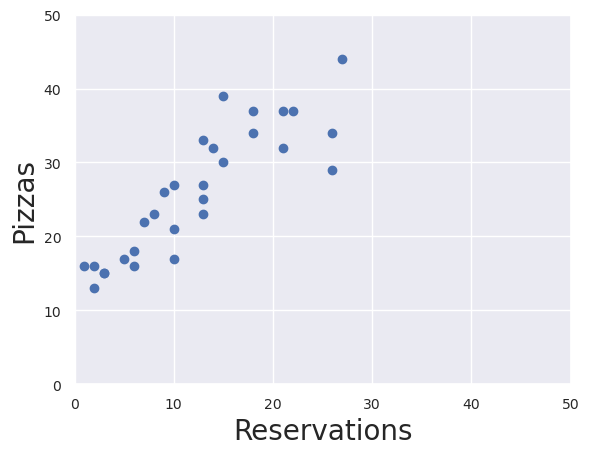

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
X, Y = np.loadtxt("/home/chm/Projekte/src/mlfs/pizza.txt", skiprows=1, unpack=True)
plt.plot(X, Y, "bo")
plt.show()

## Linerare Regression
Aus den Grunddaten soll mit Hilfe linerarer Regression eine Näherungskurve für den statistischen Verlauf ermittelt werden. Dazu müssen wir eine Gerade $y = x * w$ durch den Ursprung berechnen. Dabei steht $w$ für die Steigung der Geraden. Eine Vorhersage hat dann die Form $ŷ = x * w$. Daraus ergibt sich eine einfache Vorhersagemethode:

In [3]:
def predict(X, w):
    return X * w

Um ein möglichst gutes statistischen Modell zu generieren, müssen wir verschiedene Modelle darin vergleichen, wie hoch der sog. _Verlust_ ist, d.h. die Differenz zwischen Vorhersage und Grundwahrheit. Das Ziel ist durch ein sogenanntes _Training_, ein Modell mit möglichst geringem Verlust zu finden. In Python beschreiben wir den Verlust als 

```error = predict(X, w) - Y```

wobei `Y` den Abstand zwischen Vorhersage und Realität auf der Y-Achse beschreibt. D.h. in diesen Fällen liegt der Realitätswert über oder unter der Vorhersage. Für die Verlustminimierung interessiert uns nur der Betrag, nicht aber, ob der Wert ober- oder unterhalb des Zielwertes liegt - d.h. uns ist gleich, ob $Y$ positiv oder negativ ist. Es ist intuitiver mit einer positiven Verlustzahl zu arbeiten - eine Möglichkeit, das zu erreichen, ist den Verlust einfach zu quadrieren (statt der Betragsfunktion). Das hat Vorteile, wenn wir später mit Ableitungsfunktionen arbeiten. Wir setzen also:

```error = (predict(X, w) - Y) ** 2```

Als nächstes bilden wir den Durchschnitt dieses Verlustes für alle Werte unserer Eingabe, d.h. wir vergleichen den Abstand von Wirklichkeit und Vorhersage für jeden Datenpunkt und bilden dann den Durchschnitt darüber. Damit haben wir eine Verlustkennzahl für eine Instanz von `predict`, instanziiert durch einen Wert für den Parameter `w`. Nun können wir verschiedene `w`-Werte durchlaufen und anhand der Verlustkennzahl `error` vergleichen. Das beste Modell hat die niedrigste Verlustkennzahl.

Numpy bietet für die Durchschnittsberechnung einen praktische Bibliotheksfunktion an, so kommen wir zu folgender Methode zur Berechnung der Verlustkennzahl für ein Modell am Parameter `w`:

In [4]:
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

Dabei sind `X` und `Y` beides Numpy-Arrays. D.h. wir erhalten mit `predict` einen Array von Vorhersagen für $Ŷ$ im Modell mit Parameterwert `w`. Numpy kann nun bildet nun die Differenz des Vorhersage-Arrays zum Realitätsarray `Y`. Die Arraywerte werden dann quadriert. Und daraus bildet Numpy mit `average` den Durchschnittswert, so dass wir eine handliche Kennzahl zurückerhalten.

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

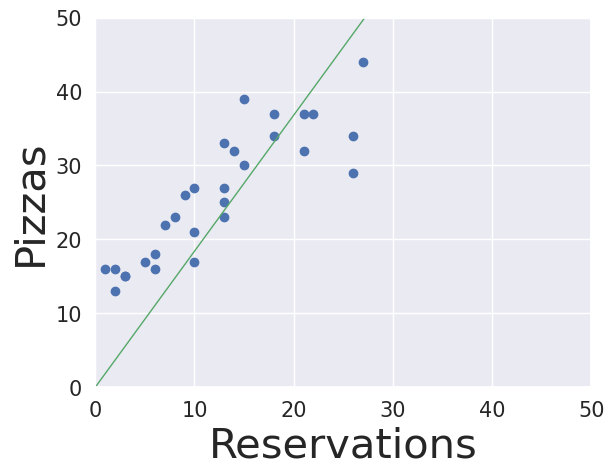

In [8]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w
        
    raise Exception("Couldn't converge within %d iterations" % iterations)

# Importiert den datensatz
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

# Trainiert das System
w = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f" % w)

# Sagt die Anzahl der Pizzas vorher
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

# Plot the chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
plt.show()
